<h1 align=center><font size=5>Linear Regression</font></h1>

## Table of contents


- [Linear regression](#LR)
    - [Data example](#LR_data)
    - [Linear regression with analytical solution](#LR_analytical)
    - [Linear regression with gradient descent](#LR_gradient_desc)
    - [Linear regression with scikit-learn](#LR_scikitlearn)
- [Polynomial regression](#poly_reg)
    - [Data example](#poly_data)
    - [Regression with polynomial features transformation](#reg_poly)
    - [Underfitting vs Overfitting](#under_over_fitting)
- [Summary](#summary)

## Linear regression <a id='LR'></a>

### Data example <a id="data"></a>

Text(0, 0.5, '$y$')

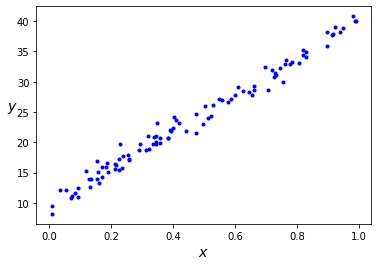

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # Number of data samples

x = np.random.rand(N, 1)
y = 10 + 30 * x + np.random.randn(N, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
#plt.show()

In [2]:
x.shape[1]

1

In [3]:
import numpy as np

In [4]:
np.hstack((np.ones((5,1)),np.random.rand(5,1)))

array([[1.        , 0.77957579],
       [1.        , 0.06983493],
       [1.        , 0.08944016],
       [1.        , 0.02355993],
       [1.        , 0.01739108]])

In [5]:
np.ones((5,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

### Linear regression with analytical solution <a id="LR_analytical"></a>

In this part, we practice how to solve the linear regression problem using analytical solution that we learned in the lesson. Please follow the following steps:

$$
J(\theta) = (X\theta-Y)^T(X\theta-Y) \\
J(\theta) = \theta^TX^TX\theta -Y^TX\theta-\theta^TX^T Y + Y^TY\\
\text{So}\\
\Delta_\theta J = 2\theta^TX^TX - 2Y^TX \\
\Delta_\theta J(\theta) = 2\theta^{T}X^TX - 2Y^TX = 0 \\
\theta^{T}X^TX = Y^TX \\
X^TX\theta = X^TY \\
\text{Finally : }
\theta = (X^TX)^{-1}X^TY \\
$$

variance of the parameter: https://math.stackexchange.com/questions/687310/variance-of-coefficients-in-a-simple-linear-regression

&#x270d; Compute the model parameters based on what you learned in the lesson. Note that, in order to compute inverse of a matrix, you can use the inv() function from Numpy's linear algebra module (i.e., np.linalg).

In [7]:
def get_best_param(x, y):  
    N=x.shape[0]
    X = np.hstack((np.ones((N, 1)), x))
    X_transpose = X.T       
    #best_params= np.matmul(np.linalg.inv(np.matmul(X_transpose,X)),np.matmul(X_transpose,y))
    #best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose.dot(y)) 
    best_params = np.linalg.inv(X_transpose.dot(X))@(X_transpose.dot(y)) 
    return best_params  

theta_best = get_best_param(x, y)
print('Estimated parameters:\n', theta_best)

Estimated parameters:
 [[ 9.79643515]
 [30.16353331]]


In [8]:
a=np.matrix([[1,2],[3,4]])
b=np.matrix([[1,2],[3,4]])
a/b

matrix([[1., 1.],
        [1., 1.]])

In [9]:
np.hstack((np.ones((N, 1)), x))

array([[1.        , 0.49479348],
       [1.        , 0.69722767],
       [1.        , 0.21315252],
       [1.        , 0.11866924],
       [1.        , 0.5286917 ],
       [1.        , 0.61060696],
       [1.        , 0.62620713],
       [1.        , 0.76073145],
       [1.        , 0.03475104],
       [1.        , 0.66002082],
       [1.        , 0.29227864],
       [1.        , 0.12843937],
       [1.        , 0.34830691],
       [1.        , 0.47425141],
       [1.        , 0.91261348],
       [1.        , 0.76277795],
       [1.        , 0.81826518],
       [1.        , 0.82838489],
       [1.        , 0.40403709],
       [1.        , 0.34346012],
       [1.        , 0.17062166],
       [1.        , 0.50247681],
       [1.        , 0.38833667],
       [1.        , 0.32201573],
       [1.        , 0.98656593],
       [1.        , 0.73086277],
       [1.        , 0.57642015],
       [1.        , 0.80547363],
       [1.        , 0.00917539],
       [1.        , 0.78307099],
       [1.

In [10]:
a=np.matrix([[1,2],[3,4]])
b=np.matrix([[1,2],[3,4]])
print(a.dot(b),'\n',a@b,'\n',np.dot(a,b),'\n',np.matmul(a,b))

[[ 7 10]
 [15 22]] 
 [[ 7 10]
 [15 22]] 
 [[ 7 10]
 [15 22]] 
 [[ 7 10]
 [15 22]]


In [11]:
np.multiply(a,b)

matrix([[ 1,  4],
        [ 9, 16]])

&#x270d; Plot the data and the fitted line

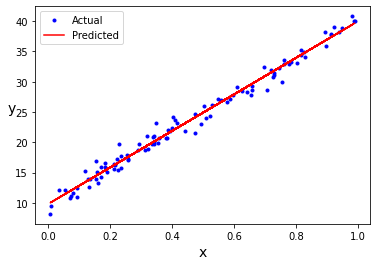

In [12]:
X = np.hstack((np.ones((N, 1)), x)) 
y_pred = X.dot(theta_best)

plt.plot(x, y, 'b.', label = 'Actual')
plt.plot(x, y_pred, 'r-', label = 'Predicted')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

&#x270d; Use the best parameter theta to make predictions over new data.

In [13]:
x_new = np.array([[0.5],[0.2]])
X_new = np.c_[np.ones((2, 1)), x_new] 
y_pred = np.matmul(X_new,theta_best)
y_pred


array([[24.8782018 ],
       [15.82914181]])

&#x270d; Plot the new data according to the prediction

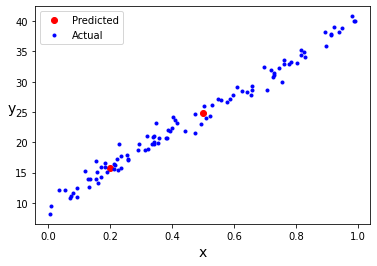

In [14]:
plt.plot(x_new, y_pred, "ro", label = 'Predicted')
plt.plot(x, y, "b.", label = 'Actual')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', rotation = 0, fontsize = 14)
plt.legend(loc='upper left')
plt.show()

### Linear regression with gradient descent <a id="LR_gradient_desc"></a>

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

&#x270d; Implement the gradient descent algorithm in order to estimate the parameter theta and display it.

In [18]:
eta = 0.05 # Set learning rate
n_iterations = 5000 # Set number of iterations
theta = np.random.randn(2,1) # Initialize theta

X = np.hstack((np.ones((N, 1)), x)) 

for iteration in range(n_iterations):
    
    #gradients = 2/N * X.T@(X@theta - y)
    gradients = 2/N * (X@theta - y).T @X
    
    theta = theta - eta * gradients.T
    
print('Estimated theta\n', theta)

Estimated theta
 [[ 9.79643515]
 [30.16353331]]


&#x270d; Plot the cost function versus training iterations

Estimated theta
 [[ 9.79643515]
 [30.16353331]]


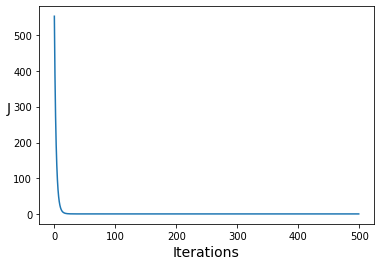

In [19]:
eta = 0.75 # Set learning rate
n_iterations = 500 # Set number of iterations
theta = np.random.randn(2,1) # Initialize theta

J = []
for iteration in range(n_iterations):
    
    y_pred = X.dot(theta)
    J.append(np.mean((y - X.dot(theta))**2))
    
    gradients = 2/N * X.T.dot(X.dot(theta) - y)

    theta = theta - eta * gradients
    
print('Estimated theta\n', theta)

plt.plot(J)
plt.xlabel('Iterations', fontsize = 14)
plt.ylabel('J', rotation = 0, fontsize = 14)
plt.show()

&#x270d; Measure performance of the linear regression model using the following metrics:

1. Mean Absolute Error (MAE)
$$
\text{MAE} = \frac{1}{N} \sum_{n=1}^{N} {\left|{y_n - \hat{y}_n}\right|}
$$

In [20]:
print('the MAE={}'.format(np.mean(np.abs(X @ theta -y))))

the MAE=0.8520621720576742


2. Mean Square Error (MSE)
$$
\text{MSE} = \frac{1}{N} \sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}
$$

In [21]:
print('the MSE={:.4}'.format(np.mean(np.power(X @ theta -y,2))))

the MSE=1.172


3. Mean Absolute Percentage Error (MAPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left|\frac{y_n - \hat{y}_n}{y_n}\right|}
$$

In [22]:
mape_sum = 0
for Xn, yn in zip(X, y):
    y_pred = Xn.dot(theta)
    mape_sum += abs((yn - y_pred)/yn)
mape = mape_sum*100/len(y)
print('MAPE:', mape)

MAPE: [4.27189998]


4. Mean Percentage Error (MPE)
$$
\text{MAPE} = \frac{100\%}{N} \sum_{n=1}^{N} {\left(\frac{y_n - \hat{y}_n}{y_n}\right)}
$$

In [23]:
print('MPE is {:.2%}'.format(np.mean(np.divide(y-X@theta,y))))

MPE is -0.37%


In [24]:
import numpy as np

In [25]:
a=np.array([1,3,3])
b=np.array([1,2,3])
a/b

array([1. , 1.5, 1. ])

5. R squared(Coefficient of determination)
$$
R^2 = 1 - \frac{\sum_{n=1}^{N} {\left({y_n - \hat{y}_n}\right)^2}}{\sum_{n=1}^{N} {\left({y_n - \bar{y}}\right)^2}}
$$ where $\bar{y} = \frac{1}{N} \sum_{n=1}^{N} {y_n}$.

In [26]:
y_mean=np.mean(y)
1-sum(np.power(y-X@theta,2))/sum(np.power(y-y_mean,2))

array([0.98351043])

In [27]:
y_pred = X.dot(theta)
ss_res = sum((y - y_pred)**2)
ss_tot = sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot
print('R2:', r2)

R2: [0.98351043]


### Linear regression with scikit-learn<a id="LR_scikitlearn"></a>

In this part, you can use linear regression implemented in linear model of sklearn package.

&#x270d; Calculate the regression parameters including the linear regression intercept and the linear regression coefficient, and make predictions over the data.

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)

print('Intercept: \n', lin_reg.intercept_)
print('Coefficient(s): \n', lin_reg.coef_)

y_pred = lin_reg.predict(x)
print('r2 score: \n', lin_reg.score(x, y))

Intercept: 
 [9.79643515]
Coefficient(s): 
 [[30.16353331]]
r2 score: 
 0.9835104319686204


&#x270d; Measure r2 score

In [29]:
print('r2 score: \n', lin_reg.score(x, y))

r2 score: 
 0.9835104319686204


In [30]:
from sklearn.metrics import r2_score
r2_score(y,X@theta)

0.9835104319686203

## Polinomial Regression <a id="poly_reg"></a>

You can actually use a linear model to fit a nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

### Data example <a id="poly_data"></a>

Let's start with generating a sample data.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

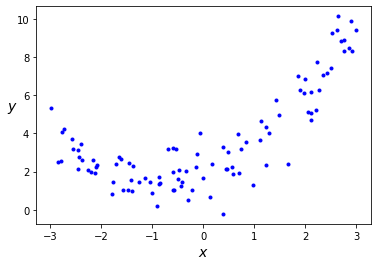

In [32]:
N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

### Regression with polynomial features transformation <a id="reg_poly"></a>

We can use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (see [here]( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for further information).


PolynomialFeartures from Sklearn <br>
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree= 2, include_bias=False)
#X_poly = poly.fit_transform(X)
poly.fit(X)
X_poly=poly.transform(X)

print('X_poly shape:', X_poly.shape)

X_poly shape: (100, 2)


In [34]:
from sklearn.linear_model import LinearRegression

$X_{poly}$ now contains the original feature of $X$ plus the square of this feature. 

&#x270d; Fit a linear regression model to this extended training data and display the intercept of linear regression and the coefficient.

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.86743329] [[0.93314315 0.55787189]]


9) Plot the prediction along with data

[1.86743329] [[0.93314315 0.55787189]]


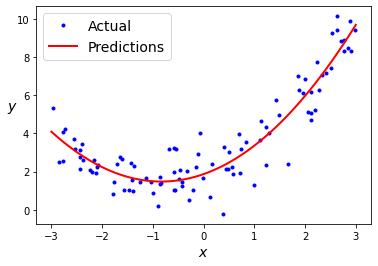

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)   
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.", label = 'Actual')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [37]:
np.linspace(-3, 3, 100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [38]:
np.linspace(-3, 3, 100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

Note that, if you perform high-degree Polynomial Regression, you will likely fit the training data much better than
with a plain Linear Regression. 

### Underfitting vs. Overfitting <a id="under_over_fitting"></a>

&#x270d; Applies a 200-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nddegree polynomial).


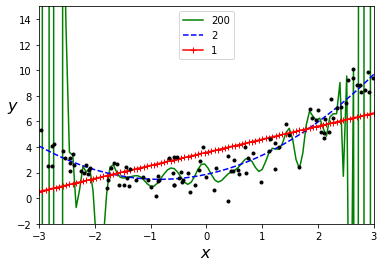

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for degree, style in ((200, "g-"), (2, "b--"), (1, "r-+")):
    # Instantiate the following models
    polynomial_features =PolynomialFeatures(degree=degree, include_bias=False) # create poly of degree 200 without bias (without intercept)
    standard_scaler =StandardScaler() # create a standard scalar object
    linear_regression =LinearRegression() # create a simple regression object
    
    # Create a pipeline
    polynomial_regression =Pipeline([('poly_feature',polynomial_features),('std_scaler',standard_scaler),('reg_',linear_regression)])# create a pipeline with the 3 objects
    
    # Fit the model using the pipeline
    polynomial_regression.fit(X,y)
    # Make predictions for X_new use the pipeline
    y_new = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_new, style, label=str(degree))

plt.plot(X, y, "k.", linewidth=3)
plt.legend(loc="best")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([-3, 3, -2, 15])
plt.show()

Notice how the 200-degree polynomial model moves to get as close as possible to training instances. Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model.

## Summary <a id='summary'></a>

- In this project, we learned how to implement a linear regression model using:
    - Analytical solution
    - Gradient descent approach
    - Scikit-learn
- We also learned about polynomial regression model and how to use it along with a linear regression model for a non-linear data.